In [2]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("train.csv")

In [5]:
new_df=df.sample(30000,random_state=1)

In [6]:
new_df.shape

(30000, 6)

In [7]:
new_df.dropna(inplace=True)

In [8]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [14]:
new_df.duplicated().sum()

0

In [16]:
print(new_df.is_duplicate.value_counts())
print(new_df.is_duplicate.value_counts()/new_df.is_duplicate.count()*100)


is_duplicate
0    18967
1    11032
Name: count, dtype: int64
is_duplicate
0    63.225441
1    36.774559
Name: count, dtype: float64


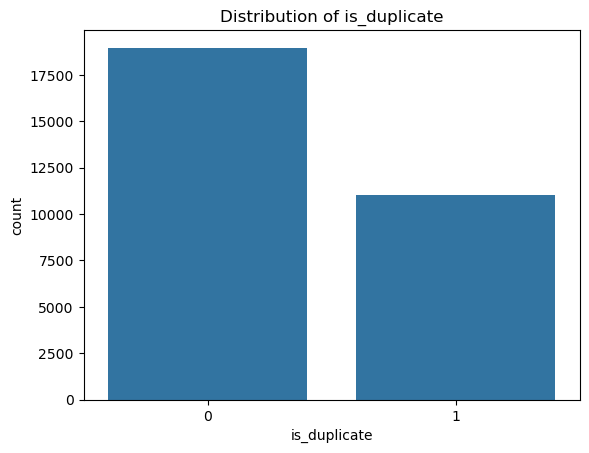

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_duplicate', data=new_df)
plt.title("Distribution of is_duplicate")
plt.show()

In [40]:
# To find repeated questions:
all_questions=pd.concat([new_df.question1,new_df.question2],ignore_index=True)

question_counts=all_questions.value_counts()

total_questions=all_questions.shape[0]

unique_questions=all_questions.nunique()

repeated_questions=(question_counts>1).sum()

question_appeared_once=(question_counts==1).sum()


print(f"Total questions in dataset: {total_questions}")
print(f"Total unique questions: {unique_questions}")
print(f"Questions that appeared only once: {question_appeared_once}")
print(f"Questions that appeared more than once: {repeated_questions}")

Total questions in dataset: 59998
Total unique questions: 55450
Questions that appeared only once: 52064
Questions that appeared more than once: 3386


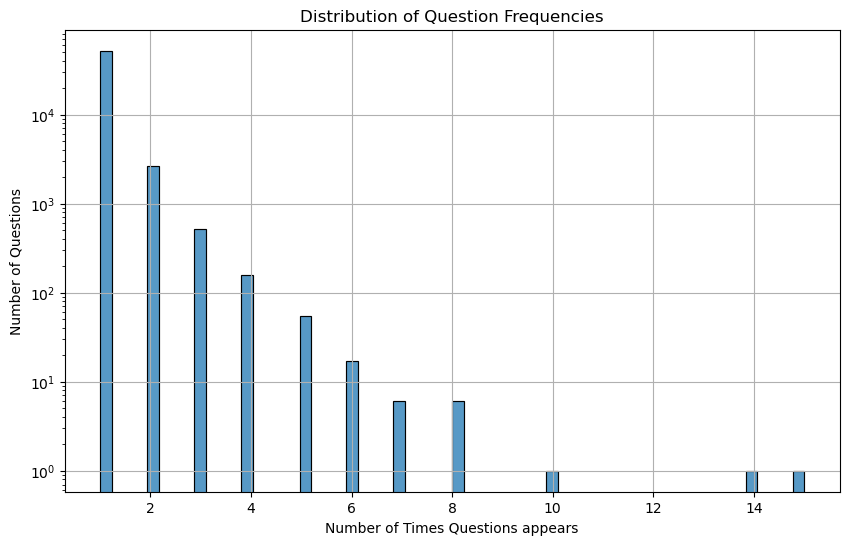

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(x=question_counts, bins=60)
plt.title("Distribution of Question Frequencies")
plt.xlabel("Number of Times Questions appears")
plt.ylabel("Number of Questions")
plt.yscale('log')
plt.grid(True)

In [56]:
df1=new_df[['question1','question2','is_duplicate']]

In [58]:
df1.head()

,question1,question2,is_duplicate
237030,How can I stop playing video games?,Should I stop playing video games with my child?,0
247341,Who is better Donald Trump or Hillary Clinton?,Why is Hillary Clinton a better choice than Do...,1
246425,What do you think is the chance that sometime ...,Do you think there will be another world war/n...,1
306985,Why are so many questions posted to Quora that...,Why do people write questions on Quora that co...,1
225863,Can there even be a movie ever rated 10/10 on ...,What are your 10/10 movies?,0


In [78]:
df1.shape

(29999, 3)

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

questions=pd.concat([df1.question1,df1.question2],axis=0)

cv=CountVectorizer(max_features=5000)
cv.fit(questions)

CountVectorizer(max_features=5000)

In [84]:
q1_vector=cv.transform(df1.question1).toarray()
q2_vector=cv.transform(df1.question2).toarray()

In [88]:
X=np.concatenate([q1_vector,q2_vector],axis=1)

In [89]:
X.shape

(29999, 10000)

In [96]:
type(X)

numpy.ndarray

In [92]:
y=df1.is_duplicate

In [94]:
y.shape

(29999,)

In [100]:
type(y)

pandas.core.series.Series

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7431666666666666

In [112]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 4.2 MB/s eta 0:00:36
   - -------------------------------------- 3.9/150.0 MB 10.2 MB/s eta 0:00:15
   -- ------------------------------------- 8.1/150.0 MB 12.9 MB/s eta 0:00:12
   --- ------------------------------------ 12.1/150.0 MB 14.5 MB/s eta 0:00:10
   ---- ----------------------------------- 16.0/150.0 MB 15.5 MB/s eta 0:00:09
   ----- ---------------------------------- 19.7/150.0 MB 15.9 MB/s eta 0:00:09
   ------ --------------------------------- 22.5/150.0 MB 16.4 MB/s eta 0:00:08
   ------- -------------------------------- 27.0/150.0 MB 16.1 MB/s eta 0:00:08
   -------- ------------------------------- 30.4/150.0 MB 16.2 MB/s eta 0:00:08
   -------- ------------------------------- 33.6/150.0 MB 16.0 MB/s eta 0:00:08
   --------- ------------------------------ 37.5/150.0 MB 16.3

In [114]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7308333333333333